In [ ]:
import requests
import time

while True:
    try:
        requests.get('https://www.google.com')
        print("Kept alive.")
    except:
        print("Failed to keep alive.")
    time.sleep(600)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
# drive.flush_and_unmount('/content/gdrive')

In [ ]:
%cd /content/gdrive/MyDrive/KAVACH 23 404 ERROR NAME NOT FOUND/


In [ ]:
!unzip Tensorflow.zip -d /


In [ ]:
%cd /content

In [ ]:
%ls

In [3]:
import os
CUSTOM_MODEL_NAME = 'my_faster_rcnn'
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet101_v1_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz'
# PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_nas_coco_2018_01_28.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [4]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
# Install Tensorflow Object Detection
if os.name=='posix':
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

In [5]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.7: C:\Users\sidsh\Desktop\Kavach Model\anprsys\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-08-05 23:25:53.193957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0805 23:25:53.272657 25488 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
C:\Users\sidsh\Desktop\Kavach Model\anprsys\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.

In [ ]:
!pip install --upgrade protobuf==3.20.0


In [ ]:
!pip install PyYaml

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
!pip install matplotlib

In [ ]:
!pip install pip==21.3.1

In [ ]:
!pip install tensorrt

In [ ]:
!pip install tensorflow-gpu

In [6]:
import object_detection

In [ ]:
!pip list

In [ ]:
!pip3 freeze > requirements.txt

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
# drive.flush_and_unmount('/content/gdrive')

In [ ]:
import shutil

# Source folder in Google Drive
# source_train_path = "/content/gdrive/MyDrive/KAVACH 23 404 ERROR NAME NOT FOUND/ANPR Dataset/train"
source_test_path = "/content/gdrive/MyDrive/KAVACH 23 404 ERROR NAME NOT FOUND/ANPR Dataset/test"

# Destination folder in Colab
# destination_train_path = "/content/Tensorflow/workspace/images/train"
destination_test_path = "/content/Tensorflow/workspace/images/test"

# Use shutil to copy the folder and its contents
# shutil.copytree(source_train_path, destination_train_path)
shutil.copytree(source_test_path, destination_test_path)

In [7]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}


In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
%rm -rf /content/Tensorflow/workspace/images/train/NL1.xml

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [ ]:
# config

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
pipeline_config.model.faster_rcnn.num_classes = len(labels)
pipeline_config.train_config.batch_size = 3
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config

In [ ]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [ ]:
#traning

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=15000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:
print(command)

In [ ]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_faster_rcnn --pipeline_config_path=Tensorflow/workspace/models/my_faster_rcnn/pipeline.config --num_train_steps=15000

In [ ]:
!zip -r /content/Tensorflow.zip /content/Tensorflow

In [ ]:
# evauluate

command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_faster_rcnn --pipeline_config_path=Tensorflow/workspace/models/my_faster_rcnn/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_faster_rcnn

In [ ]:
!pip install -U numpy

In [8]:
# load trained model from checkpoint
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [9]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-10')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


In [ ]:
!pip uninstall opencv-python

In [11]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a6/08/583e1d8d589e80a702815f58daa317bd469a32c7dc339394e2a0dc14318b/opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/38.1 MB 12.9 MB/s eta 0:00:03
    --------------------------------------- 0.9/38.1 MB 11.0 MB/s eta 0:00:04
   - -------------------------------------- 1.4/38.1 MB 11.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.1 MB 13.2 MB/s eta 0:00:03
   -- ------------------------------------- 2.5/38.1 MB 12.5 MB/s eta 0:00:03
   --- ------------------------------------ 3.4/38.1 MB 12.6 MB/s eta 0:00:03
   ---- ----------------------------------- 4.2/38.1 MB 13.4 MB/s eta 0:00:03
   ----- ---------------------------------- 5.2/38.1 MB 14.3 MB/s eta 0:00:03
   ------ --------------------------------- 5.9/38.1 MB 15.0 MB/s eta 0:00:03
   ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lvis 0.5.3 requires Cython>=0.29.12, which is not installed.


In [13]:
# detect from image
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont


In [14]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [15]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars1.png')
# IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', '0000.png')

INFO:tensorflow:depth of additional conv before box predictor: 0
Instructions for updating:
Use ref() instead.


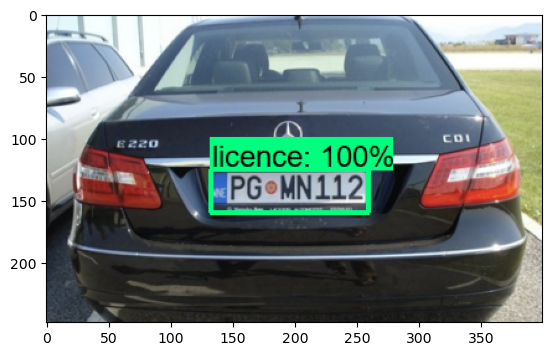

In [17]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
# ocr
!pip install easyocr
!pip3 install torch torchvision torchaudio
# !pip install paddleocr



  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/f7/72/403670eff77ee3818858cce05e8f7cbbbe81619fff4ab6efd11533c9a03f/easyocr-1.7.0-py3-none-any.whl.metadata
  Using cached easyocr-1.7.0-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/60/e7/a6dedca760db7a4686fd3b6053487ad4ad4d8f0591295dc8a9cf35269c42/opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/32/b2/1811645651153407f1e715b75afe9962d87582bee70b42c8671c255f8fe6/scikit_image-0.21.0-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_image-0.21.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/c7/b0/7b6c35b8636ed7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.13.1 requires Cython, which is not installed.
tf-models-official 2.13.1 requires gin-config, which is not installed.
tf-models-official 2.13.1 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.13.1 requires immutabledict, which is not installed.
tf-models-official 2.13.1 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.13.1 requires oauth2client, which is not installed.
tf-models-official 2.13.1 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.13.1 requires pycocotools, which is not installed.
tf-models-official 2.13.1 requires sentencepiece, which is not installed.
tf-models-official 2.13.1 requires seqeval, which is not installed.
tf-models-official 2.13.1 requires tensorflow-datasets, which is not installed.
tf

In [18]:
!pip install uuid

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6505 sha256=a819dfbf5205e2046cb66a1a722370de40c880190620754ca58c6314ecdaf101
  Stored in directory: c:\users\sidsh\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid


In [19]:
!pip install paddleocr --upgrade
!pip install paddlepaddle

  Obtaining dependency information for paddleocr from https://files.pythonhosted.org/packages/15/30/fd7b69904c0e59ee631c90e189fd483104ad3737a1859a997c16f021e4d2/paddleocr-2.7.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/32/b2/1811645651153407f1e715b75afe9962d87582bee70b42c8671c255f8fe6/scikit_image-0.21.0-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_image-0.21.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
     ---------------------------------------- 0.0/105.9 kB ? eta -:--:--
     -------------------------------------- 105.9/105.9 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
  Obtaining dependency information for visualdl from https://files.pythonhosted.org/packages/ea/b5/37726c750a4f4598660998327c3566b2d2ed5a1a5f44e9f

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sidsh\\Desktop\\Kavach Model\\anprsys\\Lib\\site-packages\\~v2\\cv2.pyd'
Check the permissions.




  Obtaining dependency information for paddlepaddle from https://files.pythonhosted.org/packages/c0/cc/e2bc4e06f847237cf0f25d6f90a6db77c2eed6bb4eca863b0307c1fac125/paddlepaddle-2.5.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for httpx from https://files.pythonhosted.org/packages/ec/91/e41f64f03d2a13aee7e8c819d82ee3aa7cdc484d18c0ae859742597d5aa0/httpx-0.24.1-py3-none-any.whl.metadata
  Obtaining dependency information for httpcore<0.18.0,>=0.15.0 from https://files.pythonhosted.org/packages/94/2c/2bde7ff8dd2064395555220cbf7cba79991172bf5315a07eb3ac7688d9f1/httpcore-0.17.3-py3-none-any.whl.metadata
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for anyio<5.0,>=3.0 from https://files.pythonhosted.org/packages/19/24/44299477fe7dcc9cb58d0a57d5a7588d6af2ff403fdd2d47a246c91a3

In [20]:
region_threshold = 0.1
detection_threshold = 0.7

gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
        try:
            # allocating 5gb for tensorflow on gpu
            tf.config.experimental.set_virtual_device_configuration(
                gpu[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
        except RunetimeError as e:
            print(e)


[]


In [23]:
import easyocr
import uuid
def filter_text(region,ocr_result,region_threshold):
        rectangle_size = region.shape[0]*region.shape[1]
        plate = []

        for result in ocr_result:
            length = np.sum(np.subtract(result[0][1],result[0][0]))
            height = np.sum(np.subtract(result[0][2],result[0][1]))
            print(length,height)

            if length*height / rectangle_size > region_threshold:
                plate.append(result[1])
        return plate

def ocr_it(image,detections,detection_threshold,region_threshold):
    # scores , boxes and classes above detection threshold
        scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))  #extracting scores whose score is greater than threshold
        boxes = detections['detection_boxes'][:len(scores)]  # filtering box coordinates (4 coordinates)
        classes = detections['detection_classes'][:len(scores)] # filtering classes => 0 - represent license

        # image dimensions
        width = image.shape[1]
        height = image.shape[0]

        # applying ROI filtering and OCR
        for idx,box in enumerate(boxes):
            roi = box * [height,width,height,width]
            region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]

            # easy ocr setup
            reader = easyocr.Reader(['en'])
            ocr_result = reader.readtext(region)
        #     print(ocr_result)

            text = filter_text(region,ocr_result,region_threshold)
            plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))
            print(text)

            return text,region


    # Saving Images
def save_results(text,region,csv_filename,folder_path):
        img_name = f'{uuid.uuid1()}.jpg'

        cv2.imwrite(os.path.join(folder_path,img_name),region)

        with open(csv_filename,mode='a',newline='',encoding="utf-8") as f:
            csv_writer = csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow([img_name,text])

In [ ]:
import cv2
import paddleocr

def ocr_it(image, detections, detection_threshold, region_threshold):
    # scores, boxes, and classes above the detection threshold
    scores = list(filter(lambda x: x > detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]

    # image dimensions
    width = image.shape[1]
    height = image.shape[0]

    # applying ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box * [height, width, height, width]
        region = image[int(roi[0]):int(roi[2]), int(roi[1]):int(roi[3])]

        # convert region to RGB for PaddleOCR
        region_rgb = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)

        # Initialize PaddleOCR instance with specified languages
        ocr = paddleocr.OCR(lang=['en', 'hi', 'mr', 'ta'])

        # Perform OCR on the region
        ocr_result = ocr.ocr(region_rgb)

        # Extract OCR text and confidence from the result
        text = [item[1][0] for item in ocr_result]
        confidence = [item[1][1] for item in ocr_result]
        language = [item[1][2] for item in ocr_result]  # Extract the detected language code

        # Filter text based on region_threshold confidence threshold and supported languages
        filtered_text = [text[i] for i in range(len(text)) if confidence[i] >= region_threshold and language[i] in ['en', 'hi', 'mr', 'ta']]

        # Print filtered text and display region
        print(filtered_text)
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

        return filtered_text, region


In [ ]:
!pip uninstall Pillow

In [ ]:
!pip install Pillow==9.5.0

In [24]:
text,region = ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
save_results(text,region,'detection_results.csv','Detection_Images')
print(text)
plt.imshow(region)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██------------------------------------------------| 4.7% Complete

Progress: |████----------------------------------------------| 8.7% Complete

Progress: |██████--------------------------------------------| 12.1% Complete

Progress: |███████-------------------------------------------| 15.6% Complete

Progress: |█████████-----------------------------------------| 19.2% Complete

Progress: |███████████---------------------------------------| 22.7% Complete

Progress: |█████████████-------------------------------------| 26.1% Complete

Progress: |██████████████------------------------------------| 29.6% Complete

Progress: |████████████████----------------------------------| 33.2% Complete

Progress: |██████████████████--------------------------------| 36.7% Complete

Progress: |████████████████████------------------------------| 40.2% Complete

Progress: |█████████████████████-----------------------------| 43.7% Complete

Progress: |███████████████████████---------------------------| 47.3% Complete

Progress: |█████████████████████████-------------------------| 50.9% Complete

Progress: |███████████████████████████-----------------------| 54.5% Complete

Progress: |█████████████████████████████---------------------| 58.1% Complete

Progress: |██████████████████████████████--------------------| 61.6% Complete

Progress: |████████████████████████████████------------------| 65.2% Complete

Progress: |██████████████████████████████████----------------| 68.8% Complete

Progress: |████████████████████████████████████--------------| 72.3% Complete

Progress: |█████████████████████████████████████-------------| 75.9% Complete

Progress: |███████████████████████████████████████-----------| 79.3% Complete

Progress: |█████████████████████████████████████████---------| 82.8% Complete

Progress: |███████████████████████████████████████████-------| 86.3% Complete

Progress: |████████████████████████████████████████████------| 89.9% Complete

Progress: |██████████████████████████████████████████████----| 93.4% Complete

Progress: |████████████████████████████████████████████████--| 97.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |████████████--------------------------------------| 24.4% Complete

Progress: |████████████████████------------------------------| 40.2% Complete

Progress: |█████████████████████████████---------------------| 60.0% Complete

Progress: |████████████████████████████████████████----------| 81.3% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

In [ ]:
# //video feed

!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))